# Loss Functions and Optimizers

As you may know, loss functions and optimizers are crucial for any neural network application. Loss functions allow you to guide the training of the network and the optimizers act as the catalyst, by determining how the weights of the neural network should change to perform better

## Initialization

First, we do the imports :

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset
As internet might be a problem, lets create our own dataset. A simple line with some noise will be enough.

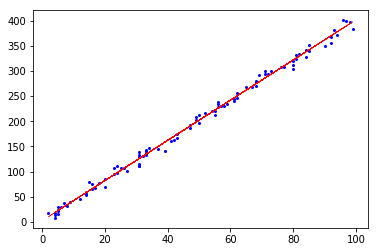

In [8]:
m = 4
c = 2
x = [np.random.randint(100) for i in range(100)]
y = [m*i + c for i in x]

y_dash = [j+np.random.normal()*8 for j in y]

plt.scatter(x, y_dash, s=4, c='b')
plt.plot(x,y,'r', linewidth=0.5)
plt.show()

## Loss Functions (Cost Function)

### Mean Absolute Error

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

![title](img/mae.png)

First lets see how much the predicted values and the truth values vary by graphing the elementwise differences.


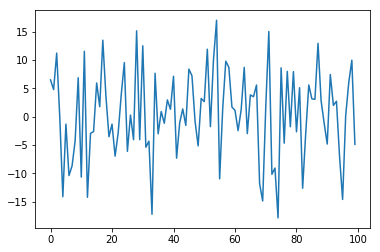

In [14]:
diff = np.zeros(len(y))
np.subtract(y_dash, y, diff)
plt.plot(diff)
plt.show()

Now lets calculate the actual loss

In [17]:
mse_loss = 0
for i in range(len(y)):
    mse_loss += abs(y_dash[i]-y[i])
    
print (mse_loss/len(y))

print (sum([abs(i-j) for i,j in zip(y_dash,y)])/len(y))

6.207081085155672
6.207081085155672


### Root Mean Squared Error
RMSE is a quadratic scoring rule that also measures the average magnitude of the error. It’s the square root of the average of squared differences between prediction and actual observation

![title](img/rmse.png)

In [20]:
rmse_loss = 0
for i in range(len(y)):
    rmse_loss += (y[i] - y_dash[i])**2
rmse_loss = rmse_loss/len(y)
rmse_loss**0.5
print (rmse_loss)


59.12990759368274


### Binary Cross Entropy
![title](img/bce.png)


In [26]:
y_true = np.random.randint(low=0,high=2,size=100)
y_pred = np.random.normal(loc=0.5, scale=0.1,size=100)

bce_loss = sum(y_true*np.log(y_pred) + (np.ones(len(y_true))-y_true)*np.log(np.ones(len(y_pred))-y_pred))
bce_loss /= len(y_pred)
bce_loss *= -1 
print (bce_loss)

0.7385203688192631


## Optimizers

### Gradient Descent

Let’s asssume we have an output variable y which we think depends linearly on the input vector x. We approximate y by
![title](img/img3.png)

The cost function for our linear least squares regression will then be
![title](img/img4.png)



In [53]:
def mse(y_true, y_pred):
    return 0.5*sum([(i-j) for i,j in zip(y_true, y_pred)])/len(y_true)
    
def shuffle(x_train, y_train):
    p =np.random.permutation(len(x_train))
    return x_train[p],y_train[p]

In [70]:
x = [np.random.randint(100) for i in range(100)]
y = [m*i + c for i in x]

y_dash = [j+np.random.normal()*8 for j in y]

x = np.array(x)
y = np.array(y)

split = int(0.8*len(x))

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

epochs = 2000
learning_rate = 1e-7

print("No. of train samples: ", len(x_train))
print("No. of test samples: ", len(x_test))

No. of train samples:  80
No. of test samples:  20


#### Batch Gradient Descent
Assume that we have a vector of paramters θ and a cost function J(θ) which is simply the variable we want to minimize (our objective function). Typically, we will find that the objective function has the form:

![title](img/img1.png)

where Ji is associated with the i-th observation in our data set. The batch gradient descent algorithm, starts with some initial feasible θ (which we can either fix or assign randomly) and then repeatedly performs the update:

![title](img/img2.png)
where η is a constant controlling step-size and is called the learning rate. Note that in order to make a single update, we need to calculate the gradient using the entire dataset. This can be very inefficient for large datasets.


7.2569263600046074
3.9884085647104497


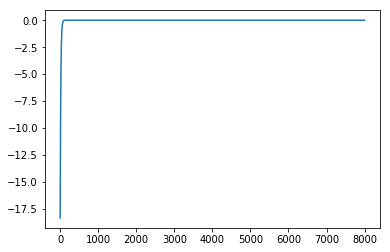

In [65]:
m = 8 #np.random.randint(10)
c = 4 #np.random.randint(10)

losses = []

for i in range(epochs):
    N = len(x_train)
    y_pred = [m*j + c for j in x_train]
    mse_loss = mse(y_train, y_pred)
    losses.append(mse_loss)
    
    m_grad = (2/N) * sum(x_train*(y_pred - y_train))
    c_grad = (2/N) * sum(y_pred-y_train)
    m = m - (learning_rate*m_grad)
    c = c - (learning_rate*c_grad)

plt.plot(losses)
print(m)
print(c)

#### Stochastic Gradient Descent
As noted, the gradient descent algorithm makes intuitive sense as it always proceeds in the direction of steepest descent (the gradient of J) and guarantees that we find a local minimum (global under certain assumptions on J). When we have very large data sets, however, the calculation of ∇(J(θ)) can be costly as we must process every data point before making a single step (hence the name “batch”). An alternative approach, the stochastic gradient descent method, is to update θ sequentially with every observation. The updates then take the form:
![title](img/img6.png)

This stochastic gradient approach allows us to start making progress on the minimization problem right away. It is computationally cheaper, but it results in a larger variance of the loss function in comparison with batch gradient descent.

Generally, the stochastic gradient descent method will get close to the optimal θ much faster than the batch method, but will never fully converge to the local (or global) minimum. Thus the stochastic gradient descent method is useful when we want a quick and dirty approximation for the solution to our optimization problem. A full recipe for stochastic gradient descent follows:

Initialize the parameter vector θ and set the learning rate α
Repeat until an acceptable approximation to the minimum is obtained:
Randomly reshuffle the instances in the training data.
For i=1,2,…mi=1,2,…m do: θ:=θ−α∇θJi(θ)



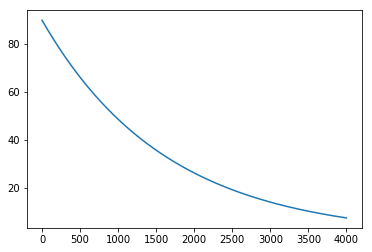

5.491067450503166
7.053291800621576


In [54]:
m = np.random.randint(10)
c = np.random.randint(10)

losses = []
i = 0

for i in range(epochs):
    N = len(x_train)
    y_pred = [m*j + c for j in x_train]
    mse_loss = mse(y_train, y_pred)
    losses.append(mse_loss)
    for i in range(len(x_train)):
        m_grad = (2/N) * (x_train[i]*(y_pred[i] - y_train[i]))
        c_grad = (2/N) * (y_pred[i]-y_train[i])
        m = m - (learning_rate*m_grad)
        c = c - (learning_rate*c_grad)

plt.plot(losses)
plt.show()
print (m)
print (c)

#### MiniBatch Gradient Descent

What if instead of single example from the dataset, we use a batch of data examples witha given size every time we calculate the gradient:
![title](img/img8.png)
This is what mini-batch gradient descent is about. Using mini-batches has the advantage that the variance in the loss function is reduced, while the computational burden is still reasonable, since we do not use the full dataset. The size of the mini-batches becomes another hyper-parameter of the problem. In standard implementations it ranges from 50 to 256.

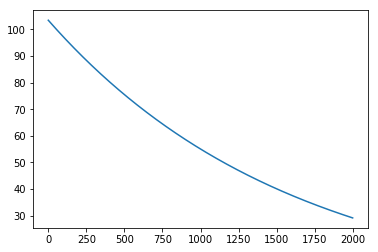

6.014008365292126
6.0470148432409125


In [72]:
m = np.random.randint(10)
c = np.random.randint(10)

losses = []
i = 0
batch_size = 32

for i in range(epochs):
    N = len(x_train)
    y_pred = [m*j + c for j in x_train]
    mse_loss = mse(y_train, y_pred)
    losses.append(mse_loss)
    i = 0
    while i < len(x_train):
        m_grad = (2/N) * sum(x_train[i:i+batch_size]*(y_pred[i:i+batch_size] - y_train[i:i+batch_size]))
        c_grad = (2/N) * sum(y_pred[i:i+batch_size]-y_train[i:i+batch_size])
        m = m - (learning_rate*m_grad)
        c = c - (learning_rate*c_grad)
        i = i + batch_size

plt.plot(losses)
plt.show()
print (m)
print (c)

#### Cubic Equation (Example)